In [82]:
%matplotlib inline
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

dummy = pd.read_table('dummy_data.txt')
dummy.head()

json_data= open('guide_interactions.log').read()
clean_data = json_data.replace("\n"+" ", ",") #this isn't doing anything
#cleandata = json.loads(json_data)  # <- this line breaks because it can't handle a new line
clean_data[:1000] #to show that there is a break between entries (look for the \n character in the output below)

'{"meta":{"sessionId":"cjsz8lhxo00003tdprlww3p4j","page":"\\/Guide\\/Replacing+a+Jeans+Button\\/19441","time":1551999784544},"metrics":{"stepTimeSpent":[],"stepThumbnailHoverCount":{"step1-stepImage1-293707":0,"step1-stepImage2-293709":0,"step1-stepImage3-293711":0,"step2-stepImage1-293714":0,"step2-stepImage2-293715":0,"step2-stepImage3-293717":0,"step3-stepImage1-293720":0,"step3-stepImage2-293722":0,"step3-stepImage3-293723":0,"step4-stepImage1-293726":0,"step4-stepImage2-293727":0,"step4-stepImage3-293730":0},"clickedGivePoints":false,"commentsTimeSpent":0}}\n{"meta":{"sessionId":"cjsxv6zft00003idmxmhuizqi","page":"\\/Guide\\/Samsung+Galaxy+S9+Motherboard+Replacement\\/119296","time":1551916810050},"metrics":{"stepTimeSpent":{"s224944":10,"s229191":10,"s224945":10,"s224946":10,"s224947":10,"s224948":10,"s224949":10,"s232538":10,"s232540":10,"s232541":10,"s232542":10,"s230010":10,"s232546":10,"s230057":10,"s230042":10,"s230060":10},"stepThumbnailHoverCount":{"step3-stepImage1-161922

In [83]:
data = json.loads(json_data[:565])

df = pd.DataFrame.from_dict(json_normalize(data), orient = 'columns') #this works, but this is only one entry
df

,meta.page,meta.sessionId,meta.time,metrics.clickedGivePoints,metrics.commentsTimeSpent,metrics.stepThumbnailHoverCount.step1-stepImage1-293707,metrics.stepThumbnailHoverCount.step1-stepImage2-293709,metrics.stepThumbnailHoverCount.step1-stepImage3-293711,metrics.stepThumbnailHoverCount.step2-stepImage1-293714,metrics.stepThumbnailHoverCount.step2-stepImage2-293715,metrics.stepThumbnailHoverCount.step2-stepImage3-293717,metrics.stepThumbnailHoverCount.step3-stepImage1-293720,metrics.stepThumbnailHoverCount.step3-stepImage2-293722,metrics.stepThumbnailHoverCount.step3-stepImage3-293723,metrics.stepThumbnailHoverCount.step4-stepImage1-293726,metrics.stepThumbnailHoverCount.step4-stepImage2-293727,metrics.stepThumbnailHoverCount.step4-stepImage3-293730,metrics.stepTimeSpent
0,/Guide/Replacing+a+Jeans+Button/19441,cjsz8lhxo00003tdprlww3p4j,1551999784544,False,0,0,0,0,0,0,0,0,0,0,0,0,0,[]


In [19]:
print(dummy.shape)

(36, 5)


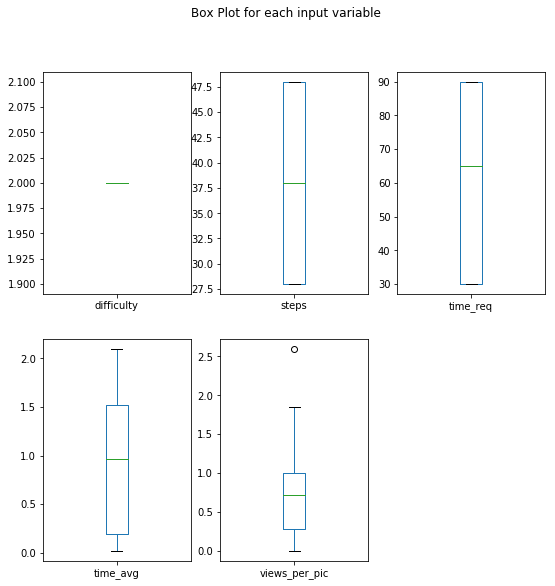

In [21]:
dummy.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('dummy_box')
plt.show()

C:\Users\White Stallion\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys
C:\Users\White Stallion\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  ax.set_xlim(boundaries_list[i])
C:\Users\White Stallion\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2.0, top=2.0
  ax.set_ylim(boundaries_list[i])
C:\Users\White Stallion\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  ax.set_xlim(boundaries_list[j])
C:\Users\White Stallion\Anaconda3\lib\site-packages\pandas\plo

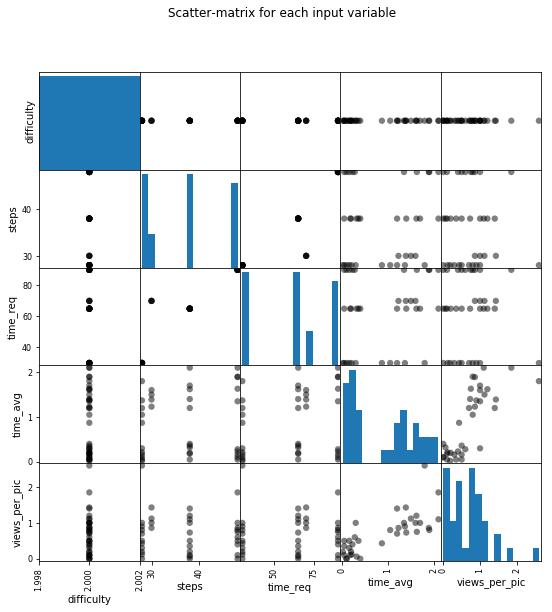

In [22]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['difficulty', 'steps', 'time_req', 'time_avg', 'views_per_pic']
X = dummy[feature_names]
y = dummy['difficulty']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('dummy_scatter_matrix')

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


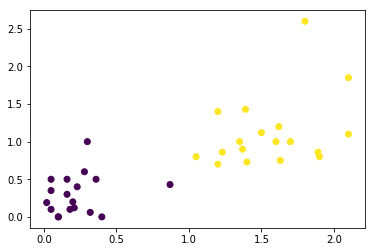

<Figure size 432x288 with 0 Axes>

In [63]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=2)

# Fitting Model
model.fit(dummy.loc[:, "time_avg" : "views_per_pic"])

# Prediction on the entire data
all_predictions = model.predict(dummy.loc[:, "time_avg" : "views_per_pic"])

# Printing Predictions
print(all_predictions)

x_axis = dummy.loc[:, "time_avg"]  # Avg time spent viewing each step
y_axis = dummy.loc[:, "views_per_pic"]  # Avg num views per picture

# Plotting
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()